In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import metrics

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
df = pd.read_csv('NASDAQ.csv')
L = len(df)
print(L)

252


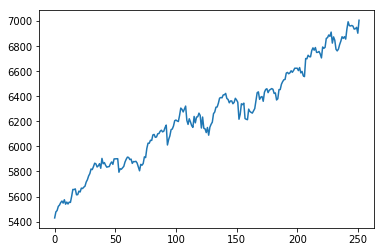

In [27]:
y = np.array([df.ix[:,4]])
plt.figure(1)
plt.plot(y[0,:])
plt.show()

In [28]:
x1=y[:,0:L-5]
x2=y[:,1:L-4]
x3=y[:,2:L-3]
x= np.concatenate([x1,x2,x3],axis=0)
x=np.transpose(x)
print(x)

[[5429.080078 5477.       5487.939941]
 [5477.       5487.939941 5521.060059]
 [5487.939941 5521.060059 5531.819824]
 [5521.060059 5531.819824 5551.819824]
 [5531.819824 5551.819824 5563.649902]
 [5551.819824 5563.649902 5547.490234]
 [5563.649902 5547.490234 5574.120117]
 [5547.490234 5574.120117 5538.72998 ]
 [5574.120117 5538.72998  5555.649902]
 [5538.72998  5555.649902 5540.080078]
 [5555.649902 5540.080078 5555.330078]
 [5540.080078 5555.330078 5552.939941]
 [5555.330078 5552.939941 5600.959961]
 [5552.939941 5600.959961 5656.339844]
 [5600.959961 5656.339844 5655.180176]
 [5656.339844 5655.180176 5660.779785]
 [5655.180176 5660.779785 5613.709961]
 [5660.779785 5613.709961 5614.790039]
 [5613.709961 5614.790039 5642.649902]
 [5614.790039 5642.649902 5636.200195]
 [5642.649902 5636.200195 5666.77002 ]
 [5636.200195 5666.77002  5663.549805]
 [5666.77002  5663.549805 5674.220215]
 [5663.549805 5674.220215 5682.450195]
 [5674.220215 5682.450195 5715.180176]
 [5682.450195 5715.180176

In [29]:
y = np.transpose(y[:,3:L-2])
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)
scaler1 = MinMaxScaler()
scaler1.fit(y)
y = scaler1.transform(y)

In [37]:
x=np.reshape(x,(x.shape[0],1,x.shape[1]))


ValueError: cannot reshape array of size 741 into shape (247,1,1)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)
model = Sequential()
model.add(LSTM(10,activation = 'tanh',input_shape = (1,3),recurrent_activation = 'hard_sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer = 'rmsprop',metrics=[metrics.mae])
model.fit(x_train,y_train,epochs=40,verbose=2)



Epoch 1/40
 - 1s - loss: 0.2747 - mean_absolute_error: 0.4642
Epoch 2/40
 - 0s - loss: 0.2383 - mean_absolute_error: 0.4287
Epoch 3/40
 - 0s - loss: 0.2127 - mean_absolute_error: 0.4023
Epoch 4/40
 - 0s - loss: 0.1907 - mean_absolute_error: 0.3785
Epoch 5/40
 - 0s - loss: 0.1707 - mean_absolute_error: 0.3554
Epoch 6/40
 - 0s - loss: 0.1524 - mean_absolute_error: 0.3337
Epoch 7/40
 - 0s - loss: 0.1351 - mean_absolute_error: 0.3120
Epoch 8/40
 - 0s - loss: 0.1186 - mean_absolute_error: 0.2904
Epoch 9/40
 - 0s - loss: 0.1034 - mean_absolute_error: 0.2687
Epoch 10/40
 - 0s - loss: 0.0893 - mean_absolute_error: 0.2472
Epoch 11/40
 - 0s - loss: 0.0767 - mean_absolute_error: 0.2264
Epoch 12/40
 - 0s - loss: 0.0652 - mean_absolute_error: 0.2074
Epoch 13/40
 - 0s - loss: 0.0547 - mean_absolute_error: 0.1899
Epoch 14/40
 - 0s - loss: 0.0456 - mean_absolute_error: 0.1743
Epoch 15/40
 - 0s - loss: 0.0379 - mean_absolute_error: 0.1589
Epoch 16/40
 - 0s - loss: 0.0313 - mean_absolute_error: 0.1450
E

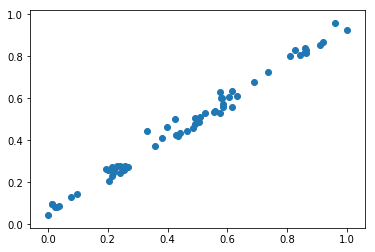

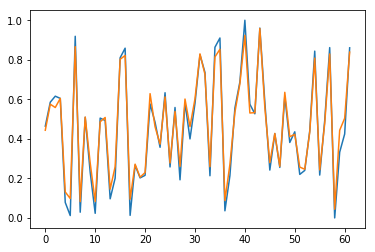

In [46]:
predict = model.predict(x_test)
plt.figure(2)
plt.scatter(y_test,predict)
plt.show()
plt.figure(3)
test = plt.plot(y_test)
predict = plt.plot(predict)
plt.show()